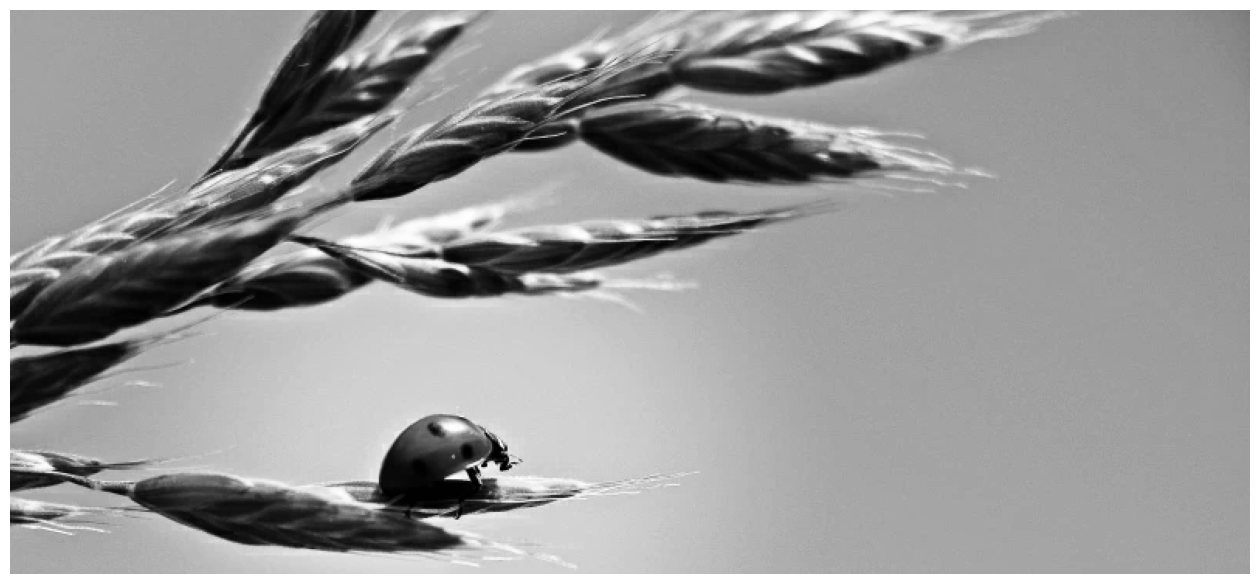

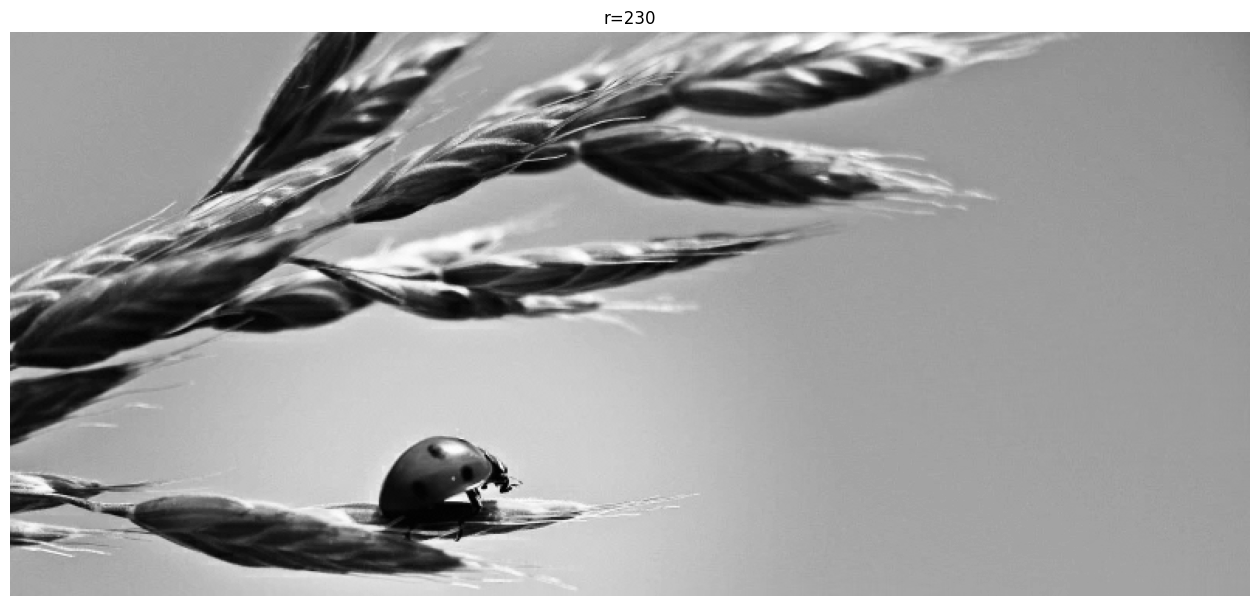

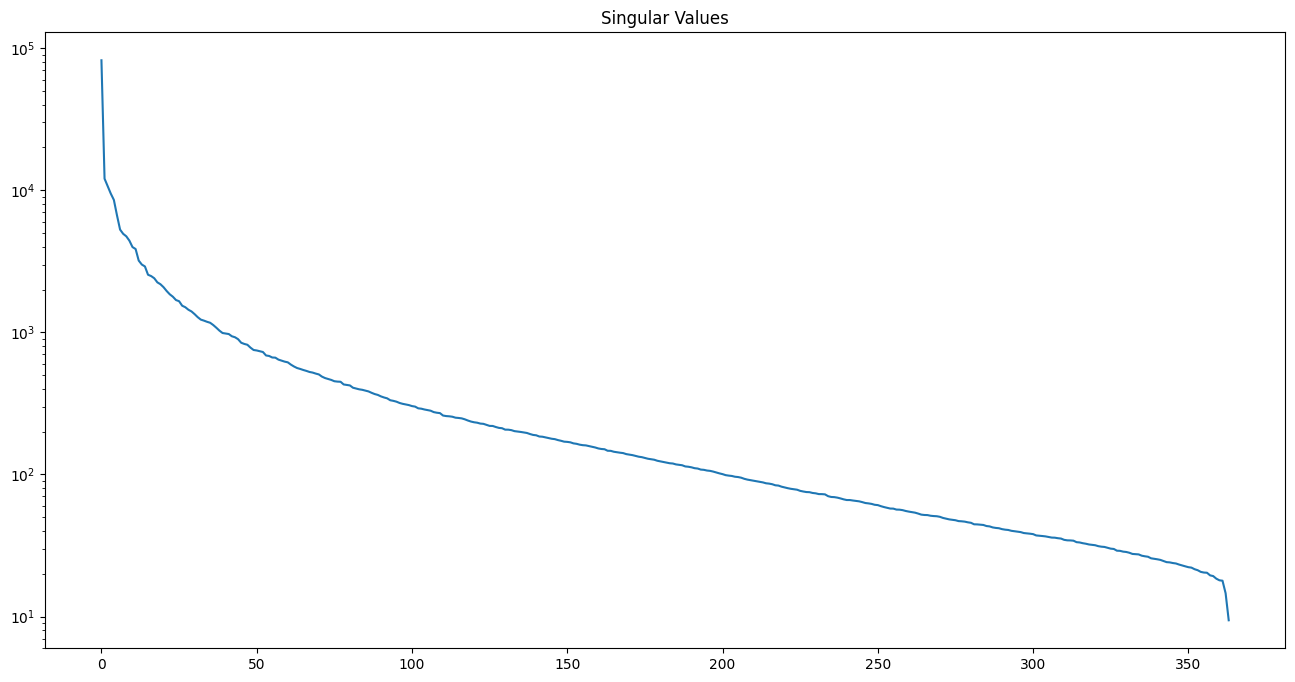

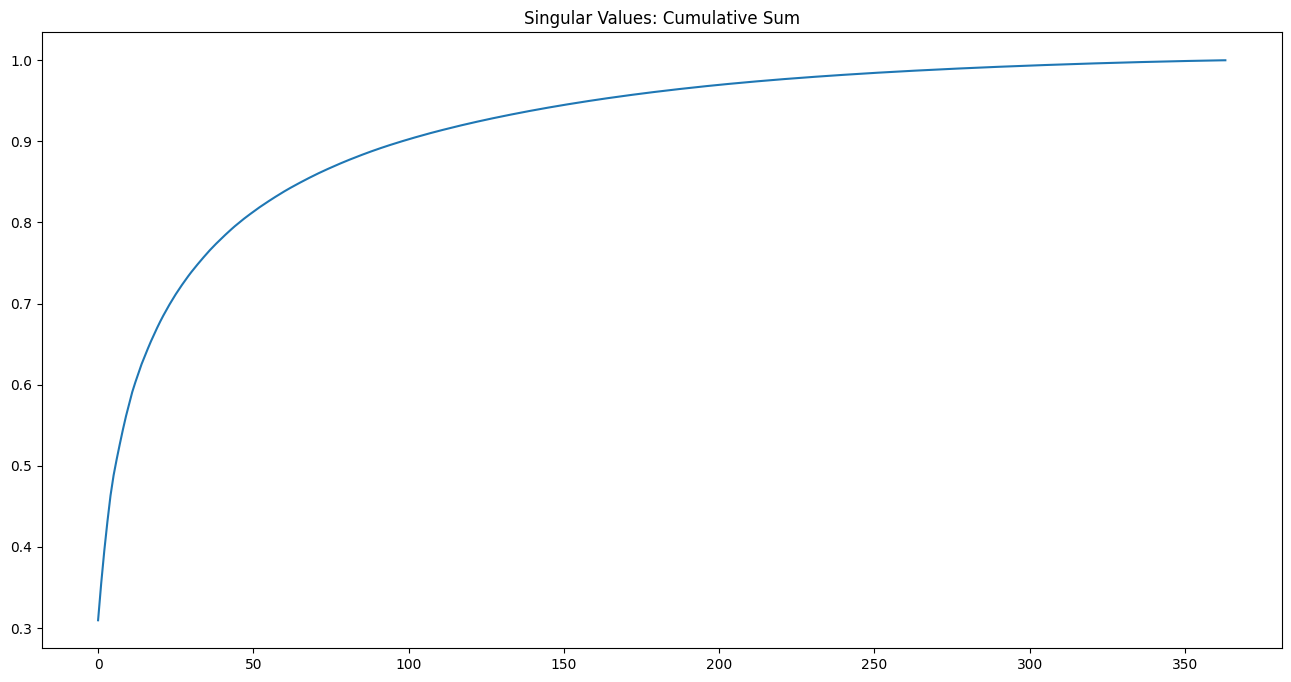

In [1]:
#Matematyka konkretna
#Wariant 15 Karolina Baron

#Zadanie dotyczy kompresji obrazu metodą SVD zgodnie z wariantem zadania. 
#Jaka powinna być użyta liczba wartości singularnych żeby zachować 90% informacji na obrazie. 

from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]
A = imread('15.webp')
X = np.mean(A,-1)

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')

U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)


r=230
Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
plt.figure(0)
img = plt.imshow(Xapprox)
img.set_cmap('gray')
plt.axis('off')
plt.title('r='+str(r))
plt.show()

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
cumulative_sum_ratio = np.cumsum(np.diag(S)) / np.sum(np.diag(S))
plt.plot(cumulative_sum_ratio)
plt.title('Singular Values: Cumulative Sum')
plt.show()
index_x = np.argmin(cumulative_sum_ratio <= 0.9)  #liczba wartości singularnych, aby zachować 90% informacji na obrazie